## Imports

Start with EDA then proceed to conducting an inferential analysis. The following libraries and modules will be crucial in these first steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## King County Dataset Column Descriptions

* **id:** Unique identifier for a house.
* **date:** Date house was sold.
* **price:** Sale price (prediction target).
* **bedrooms:** Number of bedrooms.
* **bathrooms:** Number of bathrooms.
* **sqft_living:** Square footage of living space in the home.
* **sqft_lot:** Square footage of the lot.
* **floors:** Number of floors (levels) in house.
* **waterfront:** Houses with a view to a waterfront.
* **view:** Quality of view from the house.
* **condition:** How good the overall condition of the house is. Related to maintenance of house
* **grade:** Overall grade of the house, based on King County's grading system.
* **sqft_above:** Square footage of house apart from basement.
* **sqft_basement:** Square footage of the basement.
* **yr_built:** Year when house was built.
* **yr_renovated:** Year when house was renovated.
* **zipcode:** ZIP Code used by the United States Postal Service.
* **lat:** Latitude coordinate.
* **long:** Longitude coordinate.
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors.
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors.

## Exploratory Data Analysis (EDA)

Examine the dataframe, identify inconsistencies, provide a summary statistics of the dataframe to device the best possible solution to rectifying inconsistencies if any.

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Check for null values ...

In [5]:
# Frequency distribution

for var in df: 
    
    print(df[var].value_counts()/np.float64(len(df)))

id
795000620     0.000139
8910500150    0.000093
7409700215    0.000093
1995200200    0.000093
9211500620    0.000093
                ...   
3649100387    0.000046
2767603649    0.000046
1446403617    0.000046
5602000275    0.000046
1523300157    0.000046
Name: count, Length: 21420, dtype: float64
date
6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
               ...   
11/2/2014    0.000046
1/31/2015    0.000046
5/24/2015    0.000046
5/17/2014    0.000046
7/27/2014    0.000046
Name: count, Length: 372, dtype: float64
price
450000.0    0.007964
350000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
278800.0    0.000046
439888.0    0.000046
354901.0    0.000046
942000.0    0.000046
402101.0    0.000046
Name: count, Length: 3622, dtype: float64
bedrooms
3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9    

Fill na with a new variable

In [6]:
# Fill na with a new variable
df['waterfront'] = df['waterfront'].fillna('UNknown')

# Fill na with the modal value
view_mode = df['view'].mode()[0]
df['view'].fillna(view_mode, inplace= True)


# Fill na with 0 
df['yr_renovated'] = df['yr_renovated'].fillna('0')

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Data cleaning

check for duplicates

In [7]:
df.duplicated().sum()

0

check for duplicates in the 'id' column as it should serve as a unique identifier ...

In [8]:
id_duplicates = df['id'].nunique()
df_shape = df.shape

print(df_shape)
print(id_duplicates)

(21597, 21)
21420


id should be a unique identifier, however the df rows are more than id unique values, this idicates exsting duplicate rows.

In [9]:
# Check the nature of duplicated rows
id_duplicates = df.groupby('id').filter(lambda x: len(x) > 1)
id_duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,UNknown,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,UNknown,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


Data cleaning 

Sort the 'id' duplicated rows by date, keep the rows with the latest dates and drop the rest ...

In [10]:
# sort the df according to date
df = df.sort_values(by= 'date')

# reset the index and drop the old one
df = df.reset_index(drop= True)

# Drop rows with duplicate id but keep the last row
df = df.drop_duplicates(subset= 'id', keep= 'last')

df.shape

(21420, 21)

Feature Engineering

To reduce the number of columns, the following columns will be joined:

* Get the total sqft of the houses by adding the 'sqft_lot' to 'sqft_basement', then drop the 'sqft_above' and the 'sqft_basement' columns.

In [11]:
# Convert non-numeric values to NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors= 'coerce')

# Fill NaN with the mode
basement_mode = df['sqft_basement'].mode()[0]
df['sqft_basement'] = df['sqft_basement'].fillna(basement_mode)

# Create 'total_sqft' column
df['total_sqft'] = df['sqft_lot'] + df['sqft_basement']

# Drop the 'sqft_above' and the 'sqft_basement' columns.
df = df.drop(columns= ['sqft_above', 'sqft_basement'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   21420 non-null  object 
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  int64  
 18  sqft_lot15 

Drop the following columns because they have little relevance to this analysis

Convert the id column to dtype objects, and the bedroom and floors columns to the nearest int

In [12]:
df['id'] = df['id'].astype(object)
df['yr_renovated'] = df['yr_renovated'].astype(int)
df[['bathrooms', 'floors']] = df[['bathrooms', 'floors']].round().astype(int)

df = df.drop(columns= ['zipcode', 'lat', 'long', 'date', 'sqft_living15', 'sqft_lot15'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21420 non-null  object 
 1   price         21420 non-null  float64
 2   bedrooms      21420 non-null  int64  
 3   bathrooms     21420 non-null  int32  
 4   sqft_living   21420 non-null  int64  
 5   sqft_lot      21420 non-null  int64  
 6   floors        21420 non-null  int32  
 7   waterfront    21420 non-null  object 
 8   view          21420 non-null  object 
 9   condition     21420 non-null  object 
 10  grade         21420 non-null  object 
 11  yr_built      21420 non-null  int64  
 12  yr_renovated  21420 non-null  int32  
 13  total_sqft    21420 non-null  float64
dtypes: float64(2), int32(3), int64(4), object(5)
memory usage: 2.2+ MB


## Summary statistics

In [13]:
numeric_df = df.select_dtypes(include= 'number')

desc = numeric_df.describe()

numeric_df_median = numeric_df.median()
numeric_df_mode = numeric_df.mode().iloc[0]

# Add median and mode to the summary statistics
desc.loc['median'] = numeric_df_median
desc.loc['mode'] = numeric_df_mode

desc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,total_sqft
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,5.410746e+05,3.373950,2.061951,2083.132633,1.512804e+04,1.536461,1971.092997,68.956723,1.541394e+04
std,3.678126e+05,0.925405,0.754611,918.808412,4.153080e+04,0.554534,29.387141,364.552298,4.153966e+04
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,1900.000000,0.000000,5.200000e+02
25%,3.230000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,1952.000000,0.000000,5.317500e+03
50%,4.500000e+05,3.000000,2.000000,1920.000000,7.614000e+03,2.000000,1975.000000,0.000000,7.900000e+03
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.069050e+04,2.000000,1997.000000,0.000000,1.106100e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,2015.000000,2015.000000,1.651359e+06
median,4.500000e+05,3.000000,2.000000,1920.000000,7.614000e+03,2.000000,1975.000000,0.000000,7.900000e+03
mode,4.500000e+05,3.000000,2.000000,1300.000000,5.000000e+03,1.000000,2014.000000,0.000000,5.000000e+03


There are outliers present in the df

## Outliers

Due to the skewed distribution of the numeric data, check for outliers

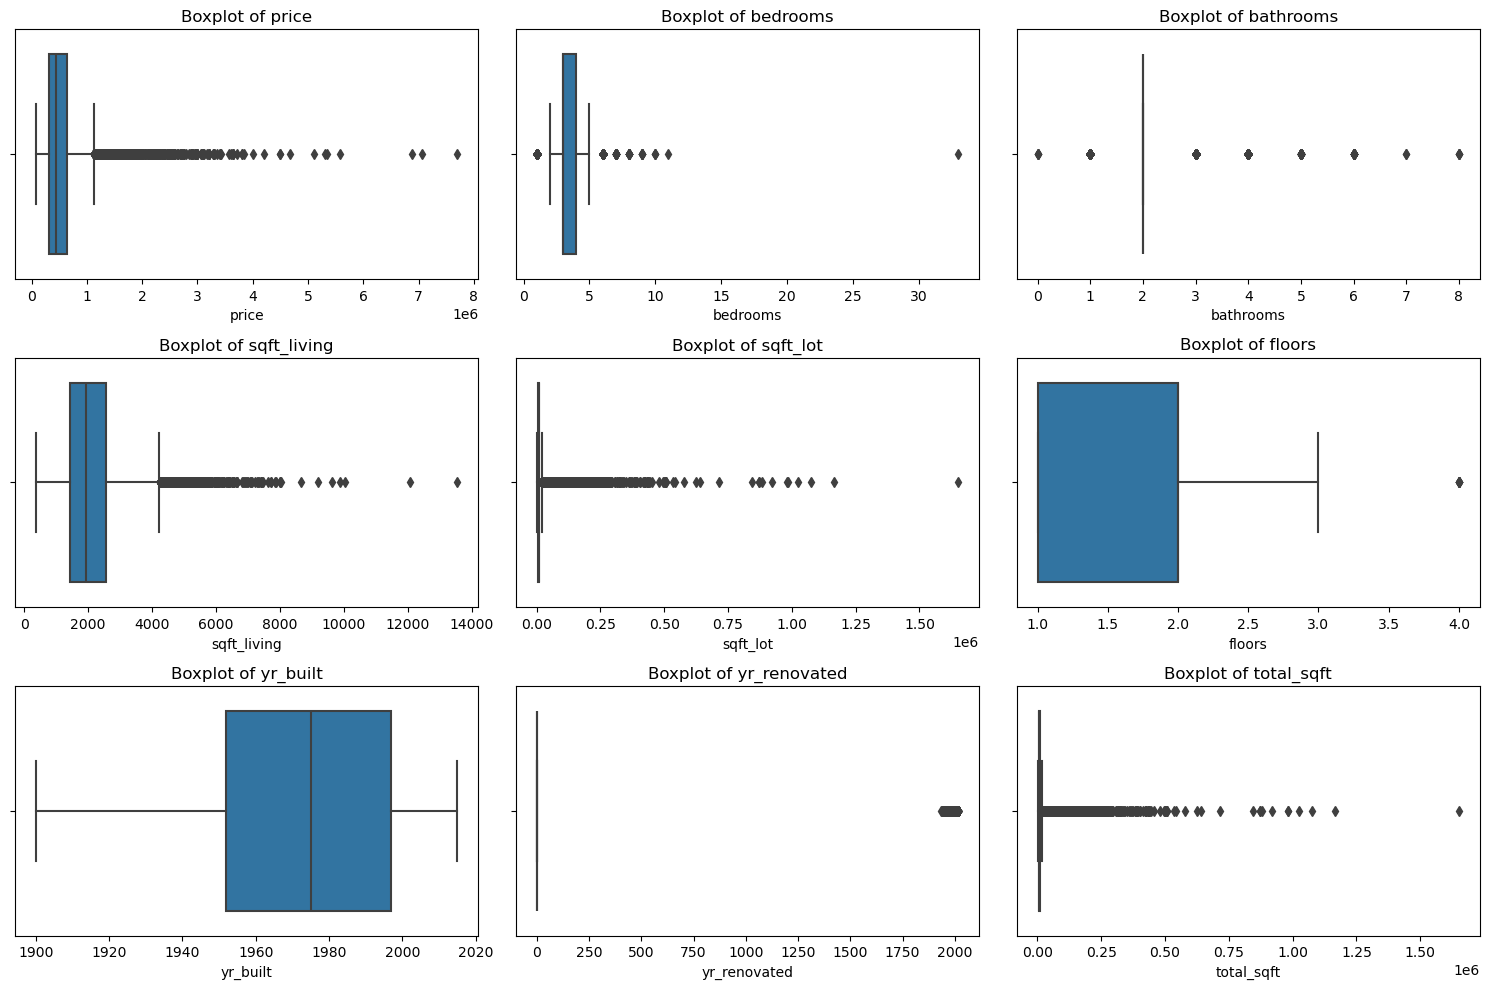

In [14]:
numeric_df = df.select_dtypes(include= 'number')

plt.figure(figsize= (15, 10))

for i, col in enumerate(numeric_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x= numeric_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()

Drop outliers from the following columns;

* bedrooms
* sqft_lot

Drop the year renovated column as most houses have not been renovated

In [15]:
outlier_df = df[['bedrooms', 'sqft_lot']]

# IQR for the selected columns
Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((outlier_df < lower_bound) | (outlier_df > upper_bound)).any(axis= 1)
outlier_indices = outlier_df.index[outliers]

# Drop all the outliers
df = df.drop(outlier_indices)
df = df.drop(columns= ['yr_renovated'])
df.shape

(18570, 13)

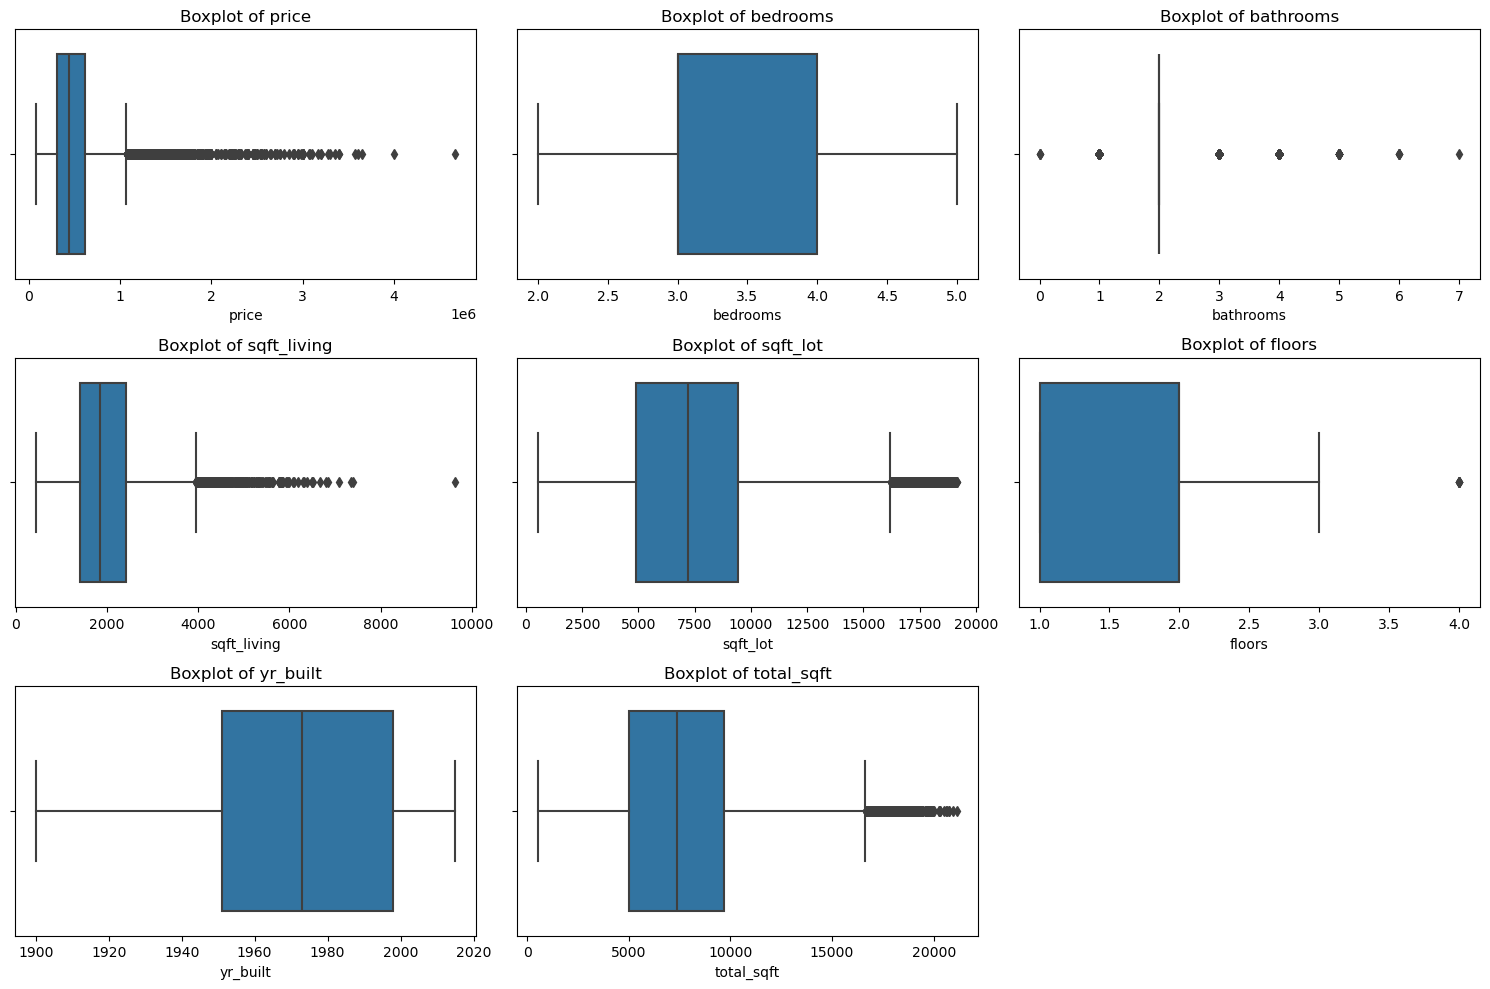

In [16]:
numeric_df = df.select_dtypes(include= 'number')

plt.figure(figsize= (15, 10))

for i, col in enumerate(numeric_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x= numeric_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()

Pair plot

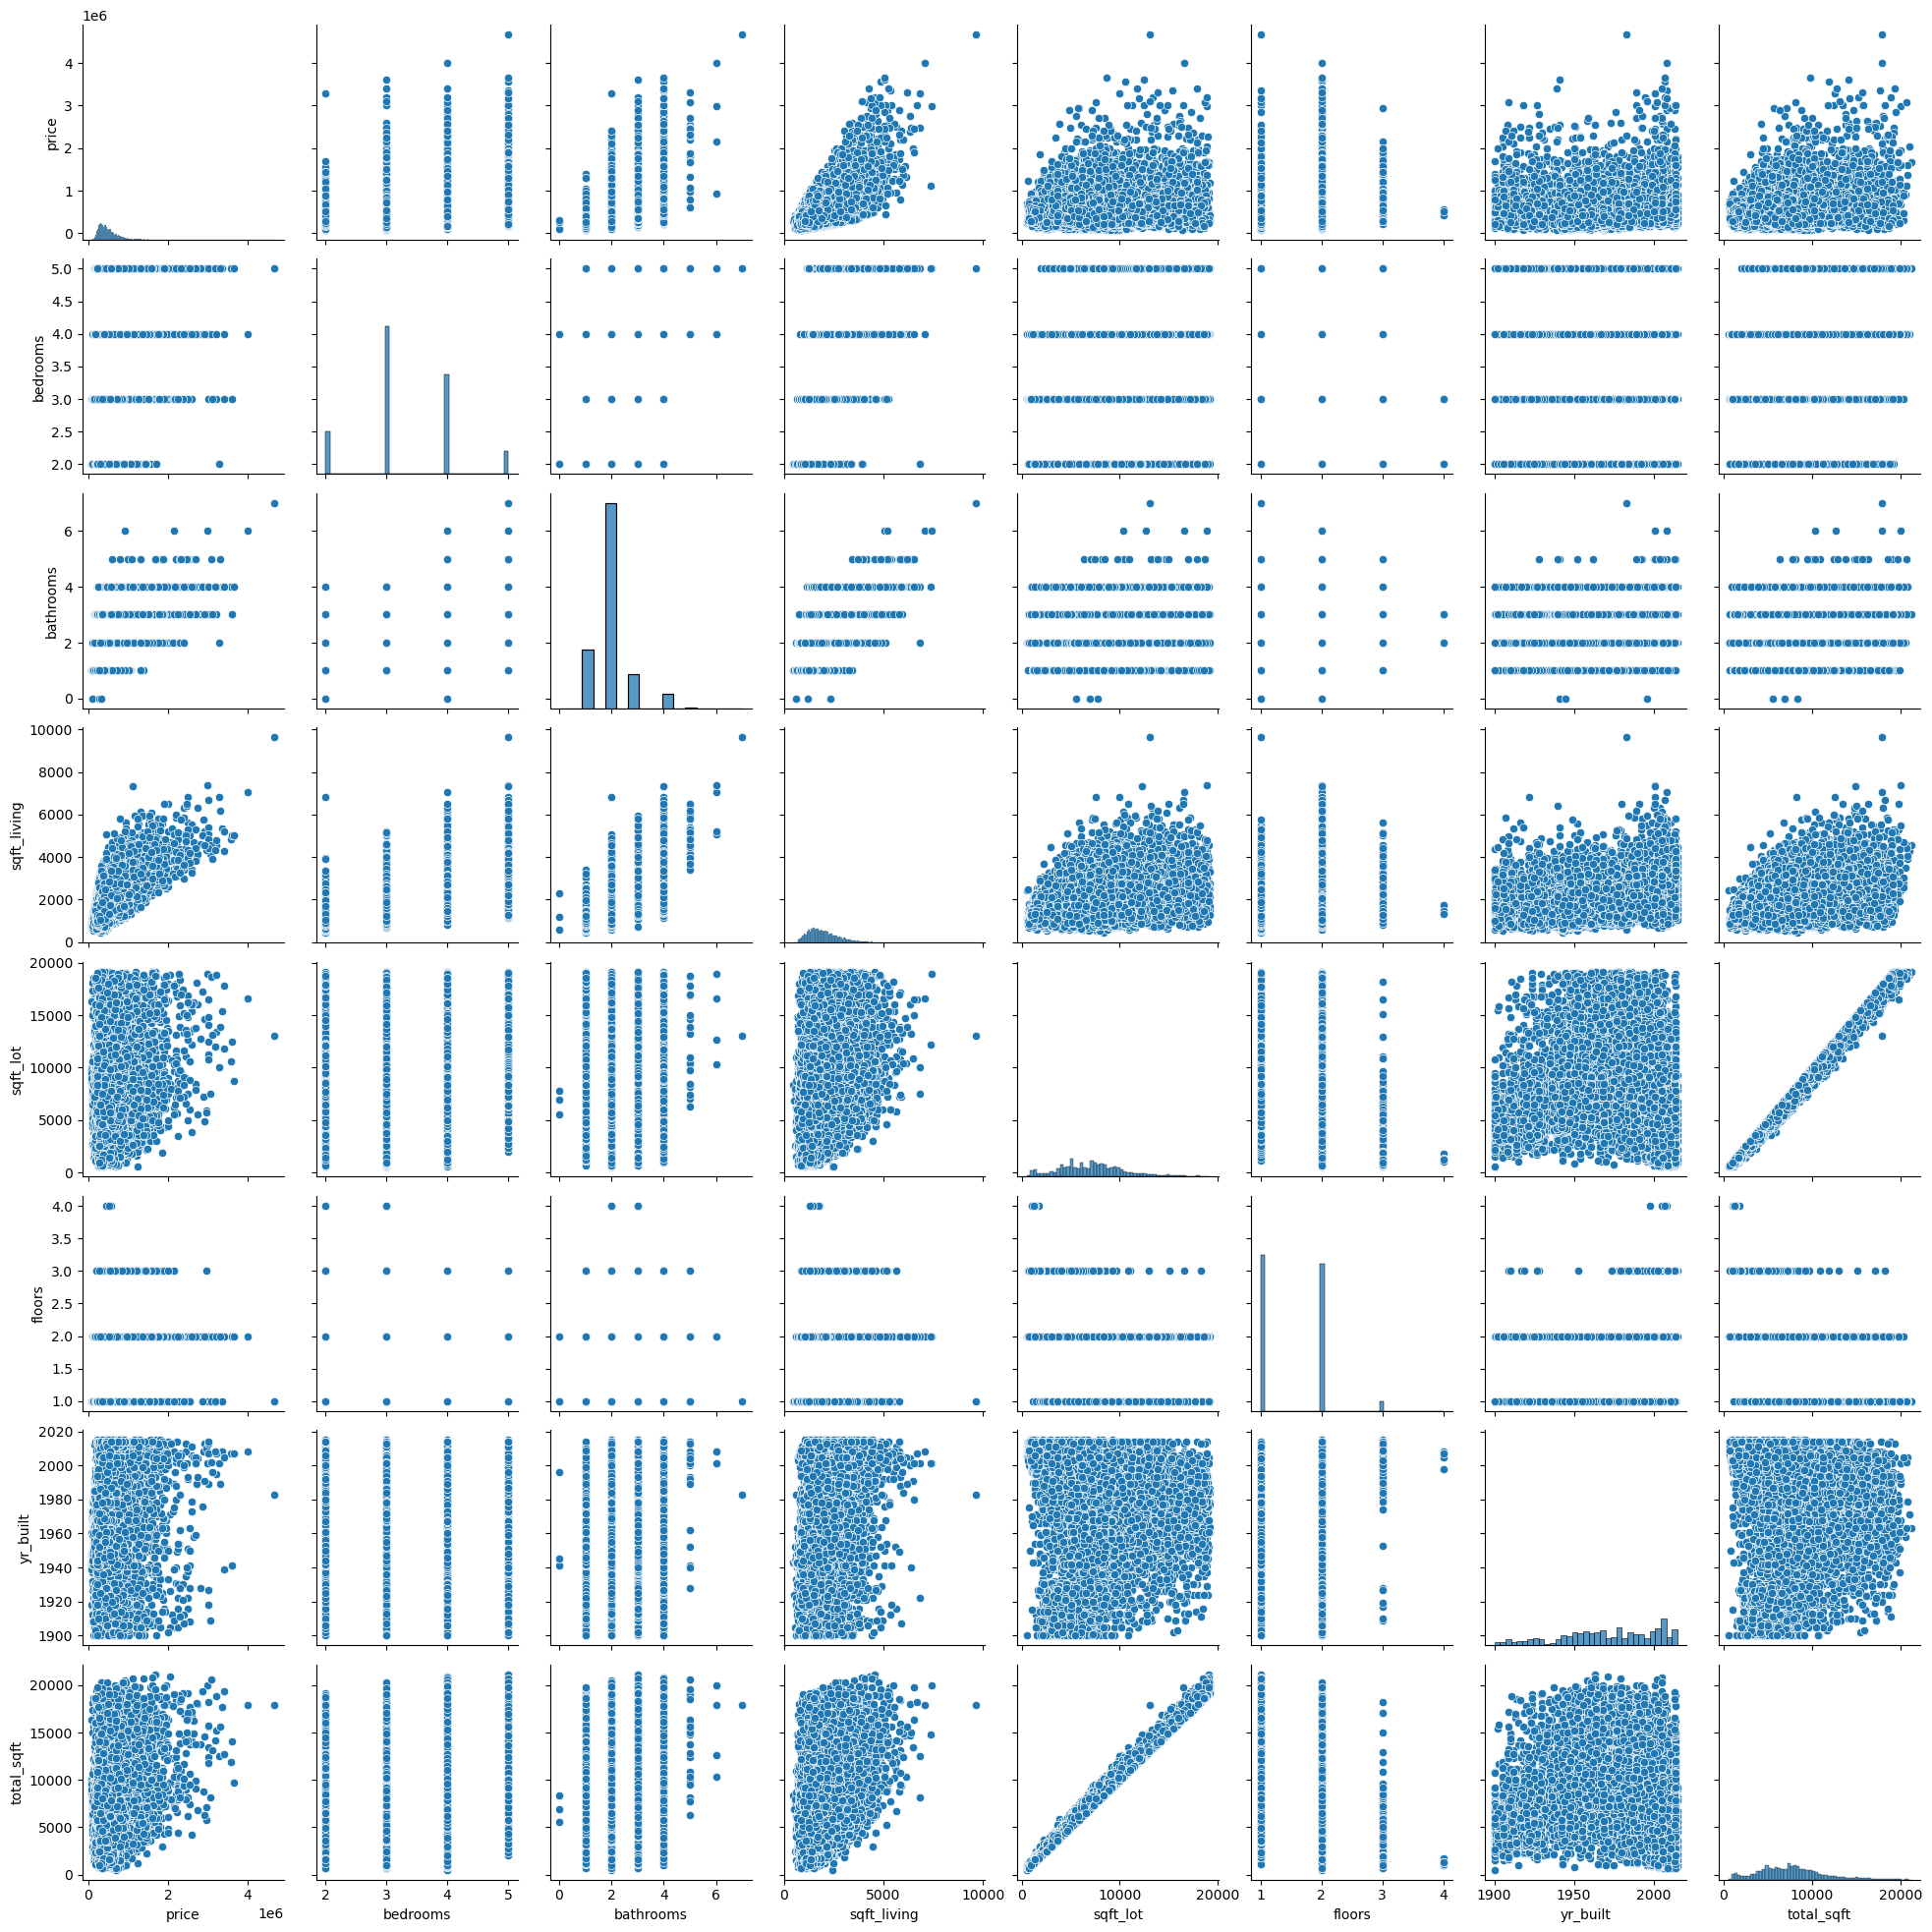

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category= FutureWarning)

    sns.pairplot(numeric_df)

In [18]:
numeric_df = df.select_dtypes(include= 'number')

numeric_df.corr()['price']

price          1.000000
bedrooms       0.303603
bathrooms      0.491214
sqft_living    0.675754
sqft_lot       0.115948
floors         0.247847
yr_built       0.028991
total_sqft     0.150538
Name: price, dtype: float64

Data Analysis
Objective 1: 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18570 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18570 non-null  object 
 1   price        18570 non-null  float64
 2   bedrooms     18570 non-null  int64  
 3   bathrooms    18570 non-null  int32  
 4   sqft_living  18570 non-null  int64  
 5   sqft_lot     18570 non-null  int64  
 6   floors       18570 non-null  int32  
 7   waterfront   18570 non-null  object 
 8   view         18570 non-null  object 
 9   condition    18570 non-null  object 
 10  grade        18570 non-null  object 
 11  yr_built     18570 non-null  int64  
 12  total_sqft   18570 non-null  float64
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 1.8+ MB


In [20]:
df.grade.value_counts()

grade
7 Average        8175
8 Good           5298
9 Better         2102
6 Low Average    1771
10 Very Good      792
11 Excellent      232
5 Fair            160
12 Luxury          26
4 Low              10
13 Mansion          4
Name: count, dtype: int64